In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import urllib

from matplotlib.cbook import get_sample_data
from matplotlib.offsetbox import (AnnotationBbox, DrawingArea, OffsetImage,
                                  TextArea)
from matplotlib.patches import Circle

df = pd.read_csv('Steamed Hams M+ Scores.csv').sort_values(['char_name','score'], ascending=False)
df['spec_cumulative'] =  df.groupby('char_name').cumcount()

#Subset - two specs, remove any with 0 score
df = df[df.score > 0]
#df = df[df.spec_cumulative <= 1]

spec_df = pd.read_csv('spec_df.csv').set_index(['class','spec_name'])
df = df.join(spec_df, on=['class','spec_name'])

df

,Unnamed: 0,class,spec_n,char_name,score,spec_name,spec_short2,spec_short,spec_cumulative,id,spec_media,spec_image
120,120,Monk,spec_2,Zymzz,293.8,Windwalker,WW,WW,0,269,https://render.worldofwarcraft.com/us/icons/56...,ww_monk.jpg
34,34,Demon Hunter,spec_1,Zymz,2643.0,Vengeance,VDH,VDH,0,581,https://render.worldofwarcraft.com/us/icons/56...,vengeance_dh.jpg
30,30,Demon Hunter,spec_0,Zymz,1995.4,Havoc,HVC,Havoc,1,577,https://render.worldofwarcraft.com/us/icons/56...,havoc_dh.jpg
60,60,Evoker,spec_1,Zymsz,853.1,Preservation,PVOKE,Prevoker,0,1468,https://render.worldofwarcraft.com/us/icons/56...,pres_evoker.jpg
63,63,Evoker,spec_2,Zymsz,216.4,Augmentation,AUG,Augvoker,1,1473,https://render.worldofwarcraft.com/us/icons/56...,aug_evoker.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...
132,132,Paladin,spec_1,Blessedthot,1903.4,Protection,PROT,Prot,0,66,https://render.worldofwarcraft.com/us/icons/56...,prot_paladin.jpg
142,142,Paladin,spec_2,Blessedthot,1006.8,Retribution,RET,Ret,1,70,https://render.worldofwarcraft.com/us/icons/56...,ret_paladin.jpg
141,141,Paladin,spec_2,Beardzz,1964.4,Retribution,RET,Ret,0,70,https://render.worldofwarcraft.com/us/icons/56...,ret_paladin.jpg
121,121,Paladin,spec_0,Beardzz,201.9,Holy,HPAL,HPal,1,65,https://render.worldofwarcraft.com/us/icons/56...,holy_paladin.jpg


In [4]:
df_agg = df[df.score > 0].groupby(['char_name','class'], as_index=False).agg(
    score_list=('score',list),
    spec_list=('spec_short',list),
    spec_image=('spec_image',list))
df_agg['Total'] = df_agg['score_list'].apply(lambda x : sum(x))
df_agg['score_list'] =  df_agg['score_list'].apply(lambda x :[0] + x)
df_agg['score_cml'] =  df_agg['score_list'].apply(lambda x : np.cumsum(x))
df_agg.sort_values('Total', inplace=True, ascending=False)
df_agg = df_agg.reset_index().head(10)
df_agg

,index,char_name,class,score_list,spec_list,spec_image,Total,score_cml
0,30,Ibubble,Paladin,"[0, 2514.6, 2453.4, 2354.7]","[Ret, Prot, HPal]","[ret_paladin.jpg, prot_paladin.jpg, holy_palad...",7322.7,"[0.0, 2514.6, 4968.0, 7322.7]"
1,7,Dingboy,Priest,"[0, 2108.3, 2038.8, 973.0]","[Disc, Shadow, Holy]","[Disc_Priest.jpg, shadow_priest.jpg, Holy_Prie...",5120.1,"[0.0, 2108.3, 4147.1, 5120.1]"
2,37,Oda,Shaman,"[0, 2287.6, 2198.6, 361.8]","[Enh, Ele, Resto]","[enh_shaman.jpg, ele_shaman.jpg, resto_shaman....",4848.0,"[0.0, 2287.6, 4486.2, 4848.0]"
3,53,Zymz,Demon Hunter,"[0, 2643.0, 1995.4]","[VDH, Havoc]","[vengeance_dh.jpg, havoc_dh.jpg]",4638.4,"[0.0, 2643.0, 4638.4]"
4,22,Fcs,Rogue,"[0, 2672.5, 1377.8]","[Sub, Outlaw]","[sub_rogue.jpg, outlaw_rogue.jpg]",4050.3,"[0.0, 2672.5, 4050.3]"
5,24,Fxs,Mage,"[0, 3006.3, 612.7]","[Fire, Frost]","[fire_mage.jpg, frost_mage.jpg]",3619.0,"[0.0, 3006.3, 3619.0]"
6,23,Fcz,Priest,"[0, 2502.1, 872.3]","[Shadow, Disc]","[shadow_priest.jpg, Disc_Priest.jpg]",3374.4,"[0.0, 2502.1, 3374.3999999999996]"
7,17,Eesow,Monk,"[0, 3021.6, 230.7]","[WW, Brew]","[ww_monk.jpg, brew_monk.jpg]",3252.3,"[0.0, 3021.6, 3252.2999999999997]"
8,26,Handycap,Warlock,"[0, 1976.9, 1145.7]","[Demo, Destro]","[demo_warlock.jpg, destro_warlock.jpg]",3122.6,"[0.0, 1976.9, 3122.6000000000004]"
9,15,Eesoh,Priest,"[0, 2717.8, 368.5]","[Holy, Shadow]","[Holy_Priest.jpg, shadow_priest.jpg]",3086.3,"[0.0, 2717.8, 3086.3]"


In [10]:
# Set Class Colour Schemes

class_colours = {
    'Monk':['#00FF98','#00FF98','#6effae','#6effae'],
    'Death Knight':['#c41e3a','#c41e3a','#d65960','#d65960'],
    'Demon Hunter':['#A330C9','#A330C9','#b762d6','#b762d6'],
    'Druid':['#FF7C0A','#FF7C0A','#ff9957','#ff9957','#ff9957'],
    'Evoker':['#33937F','#33937F','#4d9e8b','#4d9e8b'],
    'Hunter':['#AAD372','#AAD372','#b2d881','#b2d881'],
    'Mage':['#3FC7EB','#3FC7EB','#5ccded','#5ccded'],
    'Paladin':['#F48CBA','#F48CBA','#f8a4c8','#fcbbd5'],
    'Priest':['#FFFFFF','#FFFFFF','#FFFFFF','#FFFFFF'],
    'Rogue':['#FFF468','#FFF468','#fff78e','#fff78e'],
    'Shaman':['#0070DD','#0070DD','#4a8fe6','#78abef'],
    'Warlock':['#8788EE','#8788EE','#9294f1','#9294f1'],
    'Warrior':['#C69B6D','#C69B6D','#cca57c','#cca57c']}

In [11]:
df_agg['colours'] = df_agg['class'].map(class_colours)
df_agg

,index,char_name,class,score_list,spec_list,spec_image,Total,score_cml,colours
0,30,Ibubble,Paladin,"[0, 2514.6, 2453.4, 2354.7]","[Ret, Prot, HPal]","[ret_paladin.jpg, prot_paladin.jpg, holy_palad...",7322.7,"[0.0, 2514.6, 4968.0, 7322.7]","[#F48CBA, #F48CBA, #f8a4c8, #fcbbd5]"
1,7,Dingboy,Priest,"[0, 2108.3, 2038.8, 973.0]","[Disc, Shadow, Holy]","[Disc_Priest.jpg, shadow_priest.jpg, Holy_Prie...",5120.1,"[0.0, 2108.3, 4147.1, 5120.1]","[#FFFFFF, #FFFFFF, #FFFFFF, #FFFFFF]"
2,37,Oda,Shaman,"[0, 2287.6, 2198.6, 361.8]","[Enh, Ele, Resto]","[enh_shaman.jpg, ele_shaman.jpg, resto_shaman....",4848.0,"[0.0, 2287.6, 4486.2, 4848.0]","[#0070DD, #0070DD, #4a8fe6, #78abef]"
3,53,Zymz,Demon Hunter,"[0, 2643.0, 1995.4]","[VDH, Havoc]","[vengeance_dh.jpg, havoc_dh.jpg]",4638.4,"[0.0, 2643.0, 4638.4]","[#A330C9, #A330C9, #b762d6, #b762d6]"
4,22,Fcs,Rogue,"[0, 2672.5, 1377.8]","[Sub, Outlaw]","[sub_rogue.jpg, outlaw_rogue.jpg]",4050.3,"[0.0, 2672.5, 4050.3]","[#FFF468, #FFF468, #fff78e, #fff78e]"
5,24,Fxs,Mage,"[0, 3006.3, 612.7]","[Fire, Frost]","[fire_mage.jpg, frost_mage.jpg]",3619.0,"[0.0, 3006.3, 3619.0]","[#3FC7EB, #3FC7EB, #5ccded, #5ccded]"
6,23,Fcz,Priest,"[0, 2502.1, 872.3]","[Shadow, Disc]","[shadow_priest.jpg, Disc_Priest.jpg]",3374.4,"[0.0, 2502.1, 3374.3999999999996]","[#FFFFFF, #FFFFFF, #FFFFFF, #FFFFFF]"
7,17,Eesow,Monk,"[0, 3021.6, 230.7]","[WW, Brew]","[ww_monk.jpg, brew_monk.jpg]",3252.3,"[0.0, 3021.6, 3252.2999999999997]","[#00FF98, #00FF98, #6effae, #6effae]"
8,26,Handycap,Warlock,"[0, 1976.9, 1145.7]","[Demo, Destro]","[demo_warlock.jpg, destro_warlock.jpg]",3122.6,"[0.0, 1976.9, 3122.6000000000004]","[#8788EE, #8788EE, #9294f1, #9294f1]"
9,15,Eesoh,Priest,"[0, 2717.8, 368.5]","[Holy, Shadow]","[Holy_Priest.jpg, shadow_priest.jpg]",3086.3,"[0.0, 2717.8, 3086.3]","[#FFFFFF, #FFFFFF, #FFFFFF, #FFFFFF]"


In [12]:
from matplotlib.cbook import get_sample_data
from matplotlib.offsetbox import (AnnotationBbox, DrawingArea, OffsetImage,
                                  TextArea)
from matplotlib.patches import Circle

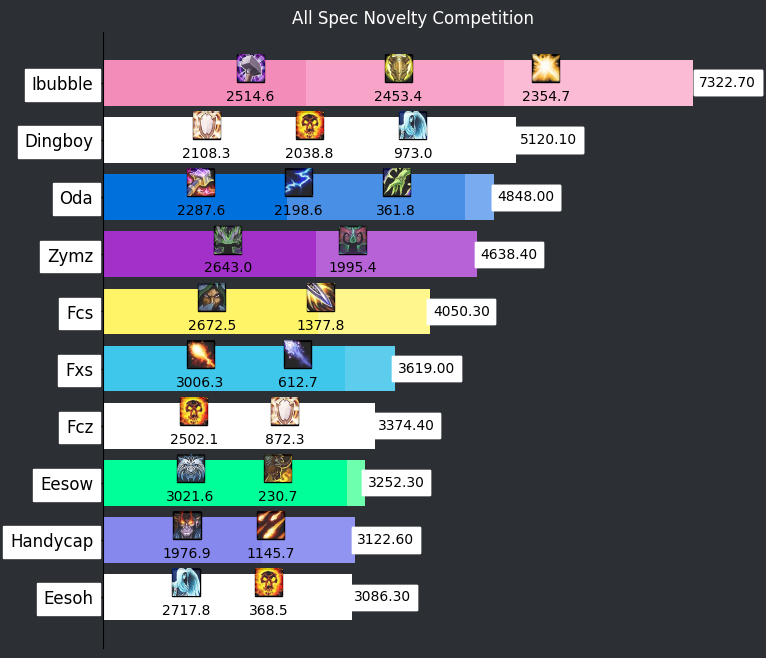

In [24]:
# Chart Generation
def barGen(df=df_agg):
    fig, ax = plt.subplots(figsize=(8,8))
    fig.set_facecolor('#2c2f33')
    ax.set_facecolor('#2c2f33')
    for i in df.index:
        score_length = len(df.loc[i]['score_list'])
        for score_idx in range(1,len(df.loc[i]['score_list'])):
            char_name = df.loc[i]['char_name']
            bar_height = df.loc[i]['score_list'][score_idx]
            color = df.loc[i]['colours'][score_idx]
            left = df.loc[i]['score_cml'][score_idx-1]
            spec = df.loc[i]['spec_list'][score_idx-1]
            score = df.loc[i]['score_list'][score_idx]
            spec_image = df.loc[i]['spec_image'][score_idx-1]

            total = df.loc[i]['Total']

            ax.barh(char_name,
                    bar_height,
                    color=color,
                    left=left,
                    #edgecolor='#2c2f33', linewidth=0.1
                    )
            
            plt.text(total * (score_idx/score_length), i+0.1,
                     f'\n{score}', ha='center', va='center', fontsize='medium',) #fontweight='bold')
            plt.text(total*1.01, i,f'{total:.2f}', ha='left', va='center', fontsize='medium', backgroundcolor="white") #Total Score
            
            a = Image.open(f'images/{spec_image}')
            imagebox = OffsetImage(a, zoom=0.35, alpha=0.85)
            #imagebox.image.axes = ax

            xy = (total * (score_idx/score_length), i-0.25)

            ab = AnnotationBbox(imagebox,
                                xy,
                                xycoords='data',
                                boxcoords="data",
                                pad=0)

            ax.add_artist(ab)

            #ax.figure.figimage(a,x0,y0)

            #plt.text(df.loc[i]['Total']*(score/len(df.loc[i]['score_list'])),i,
            #         #f'{df.loc[i]['spec_list'][score]}\n{df.loc[i]['score_list'][score]}',
            #         f'{1}'
            #         ha='center', va='center', fontsize='large', #fontweight='bold') #Spec 0 score

    plt.gca().invert_yaxis()
    plt.gca().set_xticks([])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    #ax.spines['left'].set_visible(False)

    plt.title('All Spec Novelty Competition', color='white')

    plt.setp(ax.get_yticklabels(), backgroundcolor="white", fontsize='large')



    plt.savefig('all_spec.png', bbox_inches='tight')

barGen()



In [ ]:
f = plt.figure()
nx = int(f.get_figwidth() * f.dpi)
ny = int(f.get_figheight() * f.dpi)
data = np.random.random((ny, nx))
f.figimage(icon)
plt.show()

<Figure size 640x480 with 0 Axes>

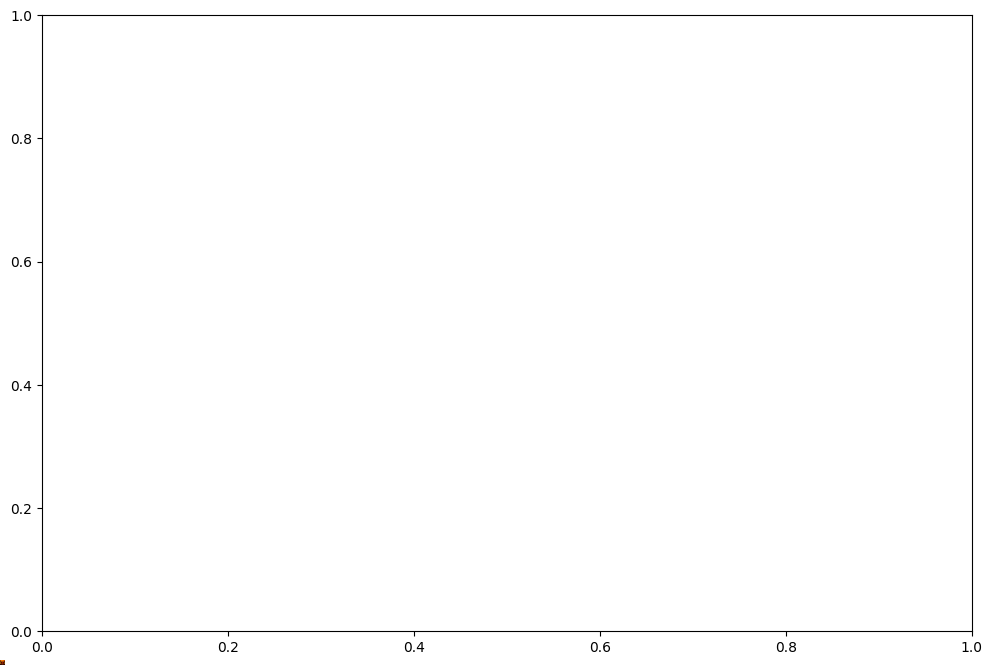

In [20]:
fig, ax = plt.subplots(figsize = (12, 8))

from matplotlib.offsetbox import (OffsetImage, AnnotationBbox)

#a = plt.imread('fury_warrior.jpg')
a = Image.open('fury_warrior.jpg')
a.thumbnail((5,5)) # resizes image in-place
imgplot = plt.figimage(a)



In [9]:
def barGen(class_name, scores, colors, specs, total, y_pos):
    ax.barh(class_name, scores[0], color=colors[0], left=0, edgecolor='#2c2f33', linewidth=0.1) #Spec 0 Bar 
    ax.barh(class_name, scores[1], color=colors[1], left=scores[0], edgecolor='#2c2f33', linewidth=0.1) #Spec 1 Bar

    plt.text(total*(1/3), y_pos, f'{specs[0]}\n{scores[0]}', ha='center', va='center', fontsize='large', #fontweight='bold'
             ) #Spec 0 score
    plt.text(total*(2/3), y_pos,f'{specs[1]}\n{scores[1]}', ha='center', va='center', fontsize='large', #fontweight='bold'
             ) #Spec 1 Score
    plt.text((scores[0]+scores[1])*1.01, y_pos,f'{round(total,2)}', ha='left', va='center', fontsize='large', backgroundcolor="white") #Total Score

    #plt.text(scores[0]/2, y_pos, f'{specs[0]}\n{scores[0]}', ha='center', va='center', fontsize='medium', fontweight='bold'
    #         ) #Spec 0 score
    #plt.text(scores[0]+scores[1]/2, y_pos,f'{specs[1]}\n{scores[1]}', ha='center', va='center', fontsize='medium', fontweight='bold'
    #         ) #Spec 1 Score
    #plt.text((scores[0]+scores[1])*1.01, y_pos,f'{round(total,2)}', ha='left', va='center', fontsize='medium', backgroundcolor="white") #Total Score

In [10]:
4968.0 * (1/3)

1656.0

### Set the plt text marks at thirds to open up more flexibility on text size

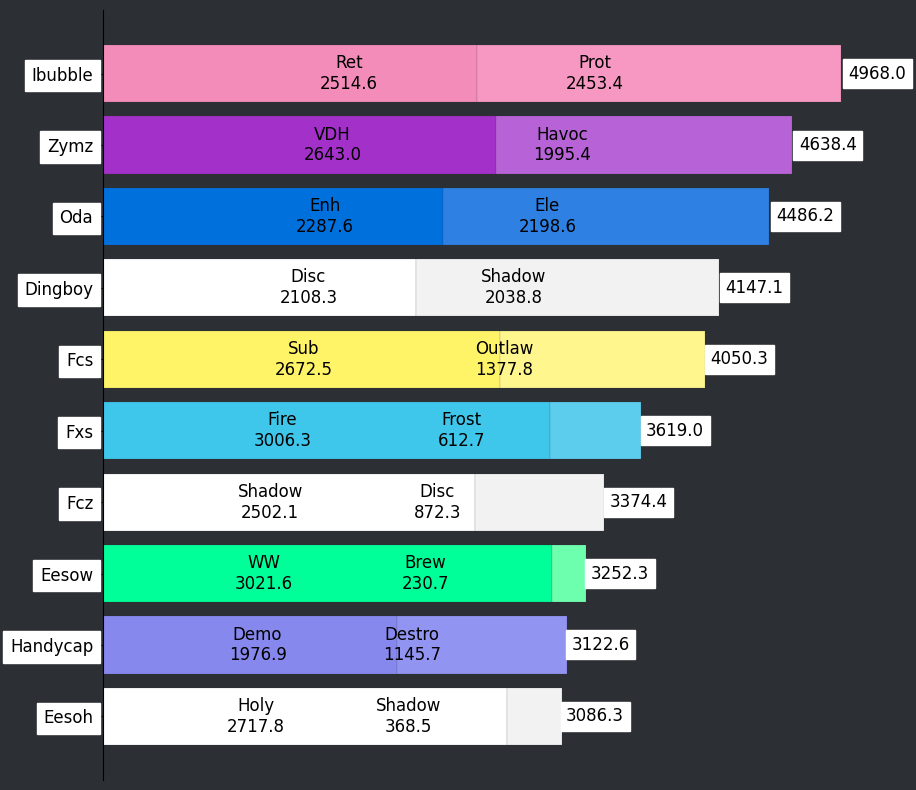

In [11]:
fig, ax = plt.subplots(figsize=(10,10))
fig.set_facecolor('#2c2f33')
ax.set_facecolor('#2c2f33')
ax.yaxis.label.set_color('red')

#plt.title('Steamed Hams Double Threat Competition\n3 November 2023', color='white')

for i in df_agg.index:
    barGen(df_agg.loc[i]['char_name'],
           scores=df_agg.loc[i]['score_list'],
           colors=df_agg.loc[i]['colours'],
           specs=df_agg.loc[i]['spec_list'],
           total=df_agg.loc[i]['Total'],
           y_pos=i)
    
plt.gca().invert_yaxis()
plt.gca().set_xticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
#ax.spines['left'].set_visible(False)



plt.setp(ax.get_yticklabels(), backgroundcolor="white", fontsize='large')

plt.savefig('double_threat.png', bbox_inches='tight')